In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


C:\Users\sunis\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading the fake and true datasets
fake_news = pd.read_csv('D:\\bits\\sem4\\project_dataset\\Fake.csv')
true_news = pd.read_csv('D:\\bits\\sem4\\project_dataset\\True.csv')

# print shape of fake dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(fake_news.shape))
print (fake_news.info())
print("\n --------------------------------------- \n")

# print shape of true dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(true_news.shape))
print (true_news.info())

The shape of the  data is (row, column):(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

 --------------------------------------- 

The shape of the  data is (row, column):(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [3]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [4]:
#Concatenating and dropping for fake news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

#Concatenating and dropping for true news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [5]:
#fake_news.head()
fake_news['date'].value_counts()

May 10, 2017         46
May 26, 2016         44
May 6, 2016          44
May 5, 2016          44
May 11, 2016         43
                     ..
December 9, 2017      1
December 4, 2017      1
November 19, 2017     1
November 20, 2017     1
Jul 19, 2015          1
Name: date, Length: 1681, dtype: int64

In [6]:
#Removing links and the headline from the date column
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]

In [7]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

In [8]:
#combine all news
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)
news_dataset

,subject,date,news,output
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1


In [9]:
#Creating a copy 
clean_news=news_dataset.copy()

In [10]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [11]:
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends out embarrassing new year’...,0
1,News,2017-12-31,drunk bragging trump staffer started russian ...,0
2,News,2017-12-30,sheriff david clarke becomes an internet joke...,0
3,News,2017-12-29,trump is so obsessed he even has obama’s name...,0
4,News,2017-12-25,pope francis just called out donald trump dur...,0


In [12]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends embarrassing new year’s eve...,0
1,News,2017-12-31,drunk bragging trump staffer started russian c...,0
2,News,2017-12-30,sheriff david clarke becomes internet joke thr...,0
3,News,2017-12-29,trump obsessed even obama’s name coded website...,0
4,News,2017-12-25,pope francis just called donald trump christma...,0


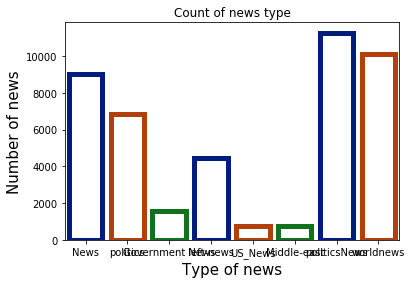

In [13]:
#EDA
#In this section we will complete do exploratory data analysis on news such as ngram analysis and 
#understand which are all the words,context which are most likely found in fake news

#Plotting the frequency plot
ax = sns.countplot(x="subject", data=clean_news,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

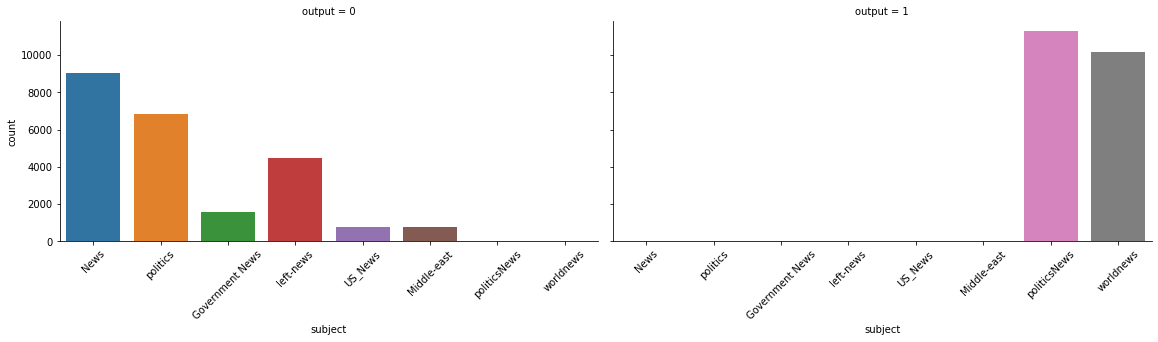

In [14]:
#Lets look at the count based on the fake/true outcome
g = sns.catplot(x="subject", col="output",
                data=clean_news, kind="count",
                height=4, aspect=2)

#Rotating the xlabels
g.set_xticklabels(rotation=45)

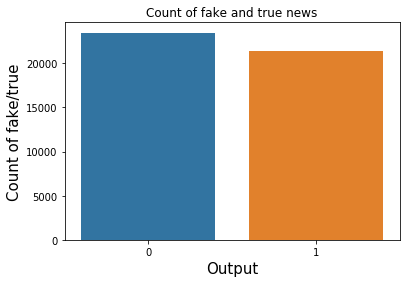

In [15]:
#Let's check the count of fake and true news and confirm whether our data is balanced or not
ax=sns.countplot(x="output", data=clean_news)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

#We have a pretty much balanced data
#But the count of fake news is higher than the true news but not on a greater extent

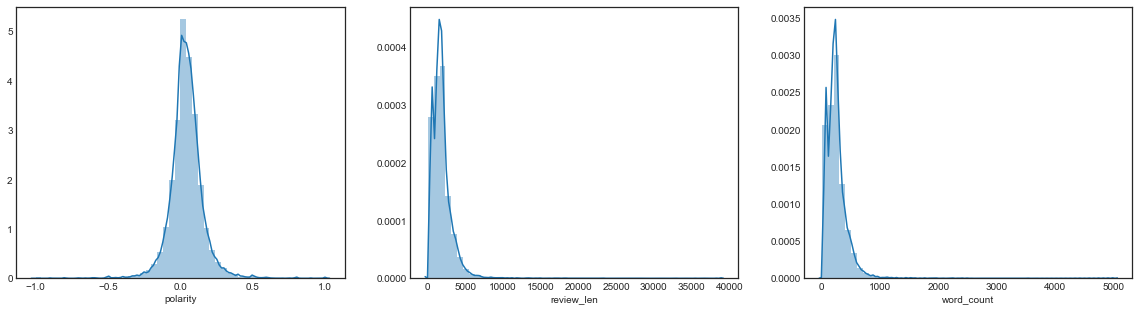

In [16]:
#Extracting the features from the news
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()

#Most of the polarity are neutral, neither it shows some bad news nor much happy news
#The word count is between 0-1000 and the length of the news are between 0-5000 
#and few near 10000 words which could be an article

In [17]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')

trump 140400
said 130258
not 82894
us 68081
president 53189
will 50945
people 41718
one 36146
state 33190
new 31799
also 31209
obama 29881
no 29713
clinton 29003
house 28716
can 27522
government 27392
donald 27376
reuters 27348
states 26331


In [18]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')

donald trump 25057
united states 18394
white house 15485
hillary clinton 9502
new york 8110
north korea 7053
president donald 6926
image via 6188
barack obama 5603
trump said 4790
prime minister 4753
president trump 4641
supreme court 4595
last year 4560
last week 4512
said statement 4426
fox news 4074
president obama 4065
islamic state 4014
national security 3858


In [19]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(clean_news['news'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in news')

president donald trump 6808
president barack obama 3735
new york times 2034
donald trump realdonaldtrump 1790
reuters president donald 1476
black lives matter 1431
president united states 1096
white house said 1050
presidentelect donald trump 1043
new york city 1006
president vladimir putin 955
news century wire 951
national security adviser 898
affordable care act 868
director james comey 860
speaker paul ryan 851
fbi director james 778
state rex tillerson 775
secretary state rex 765
russian president vladimir 745


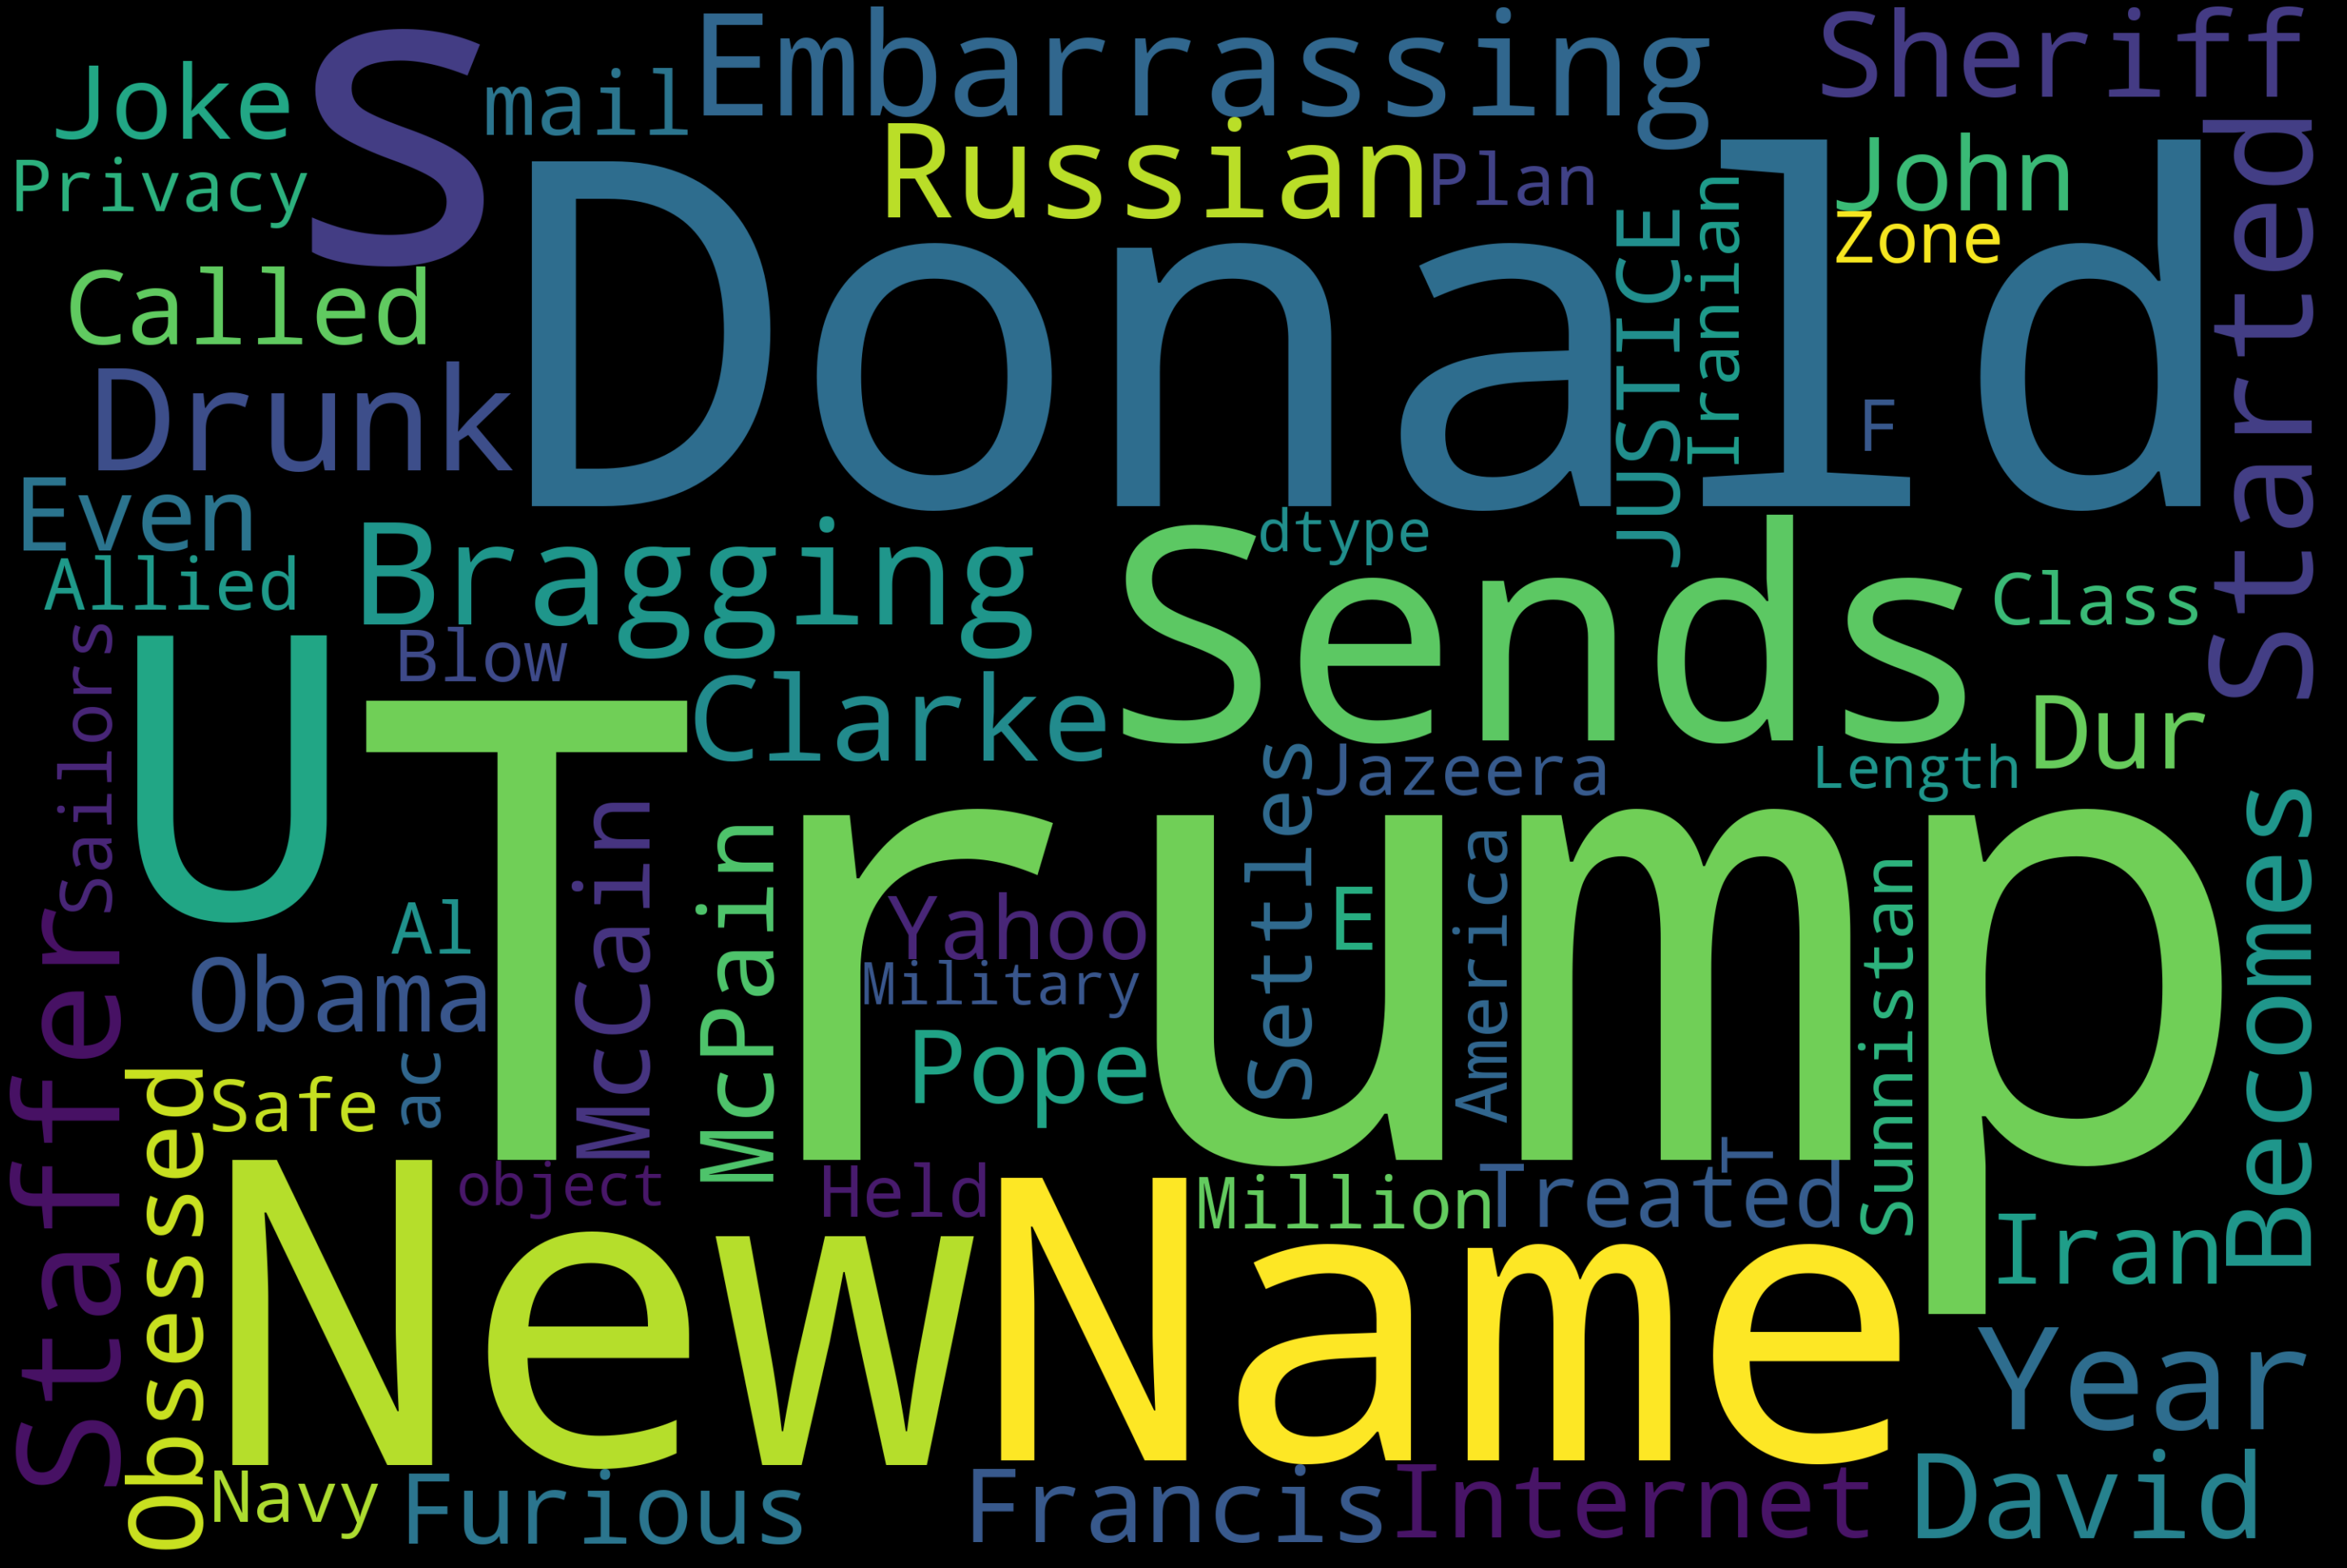

In [20]:
text = fake_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

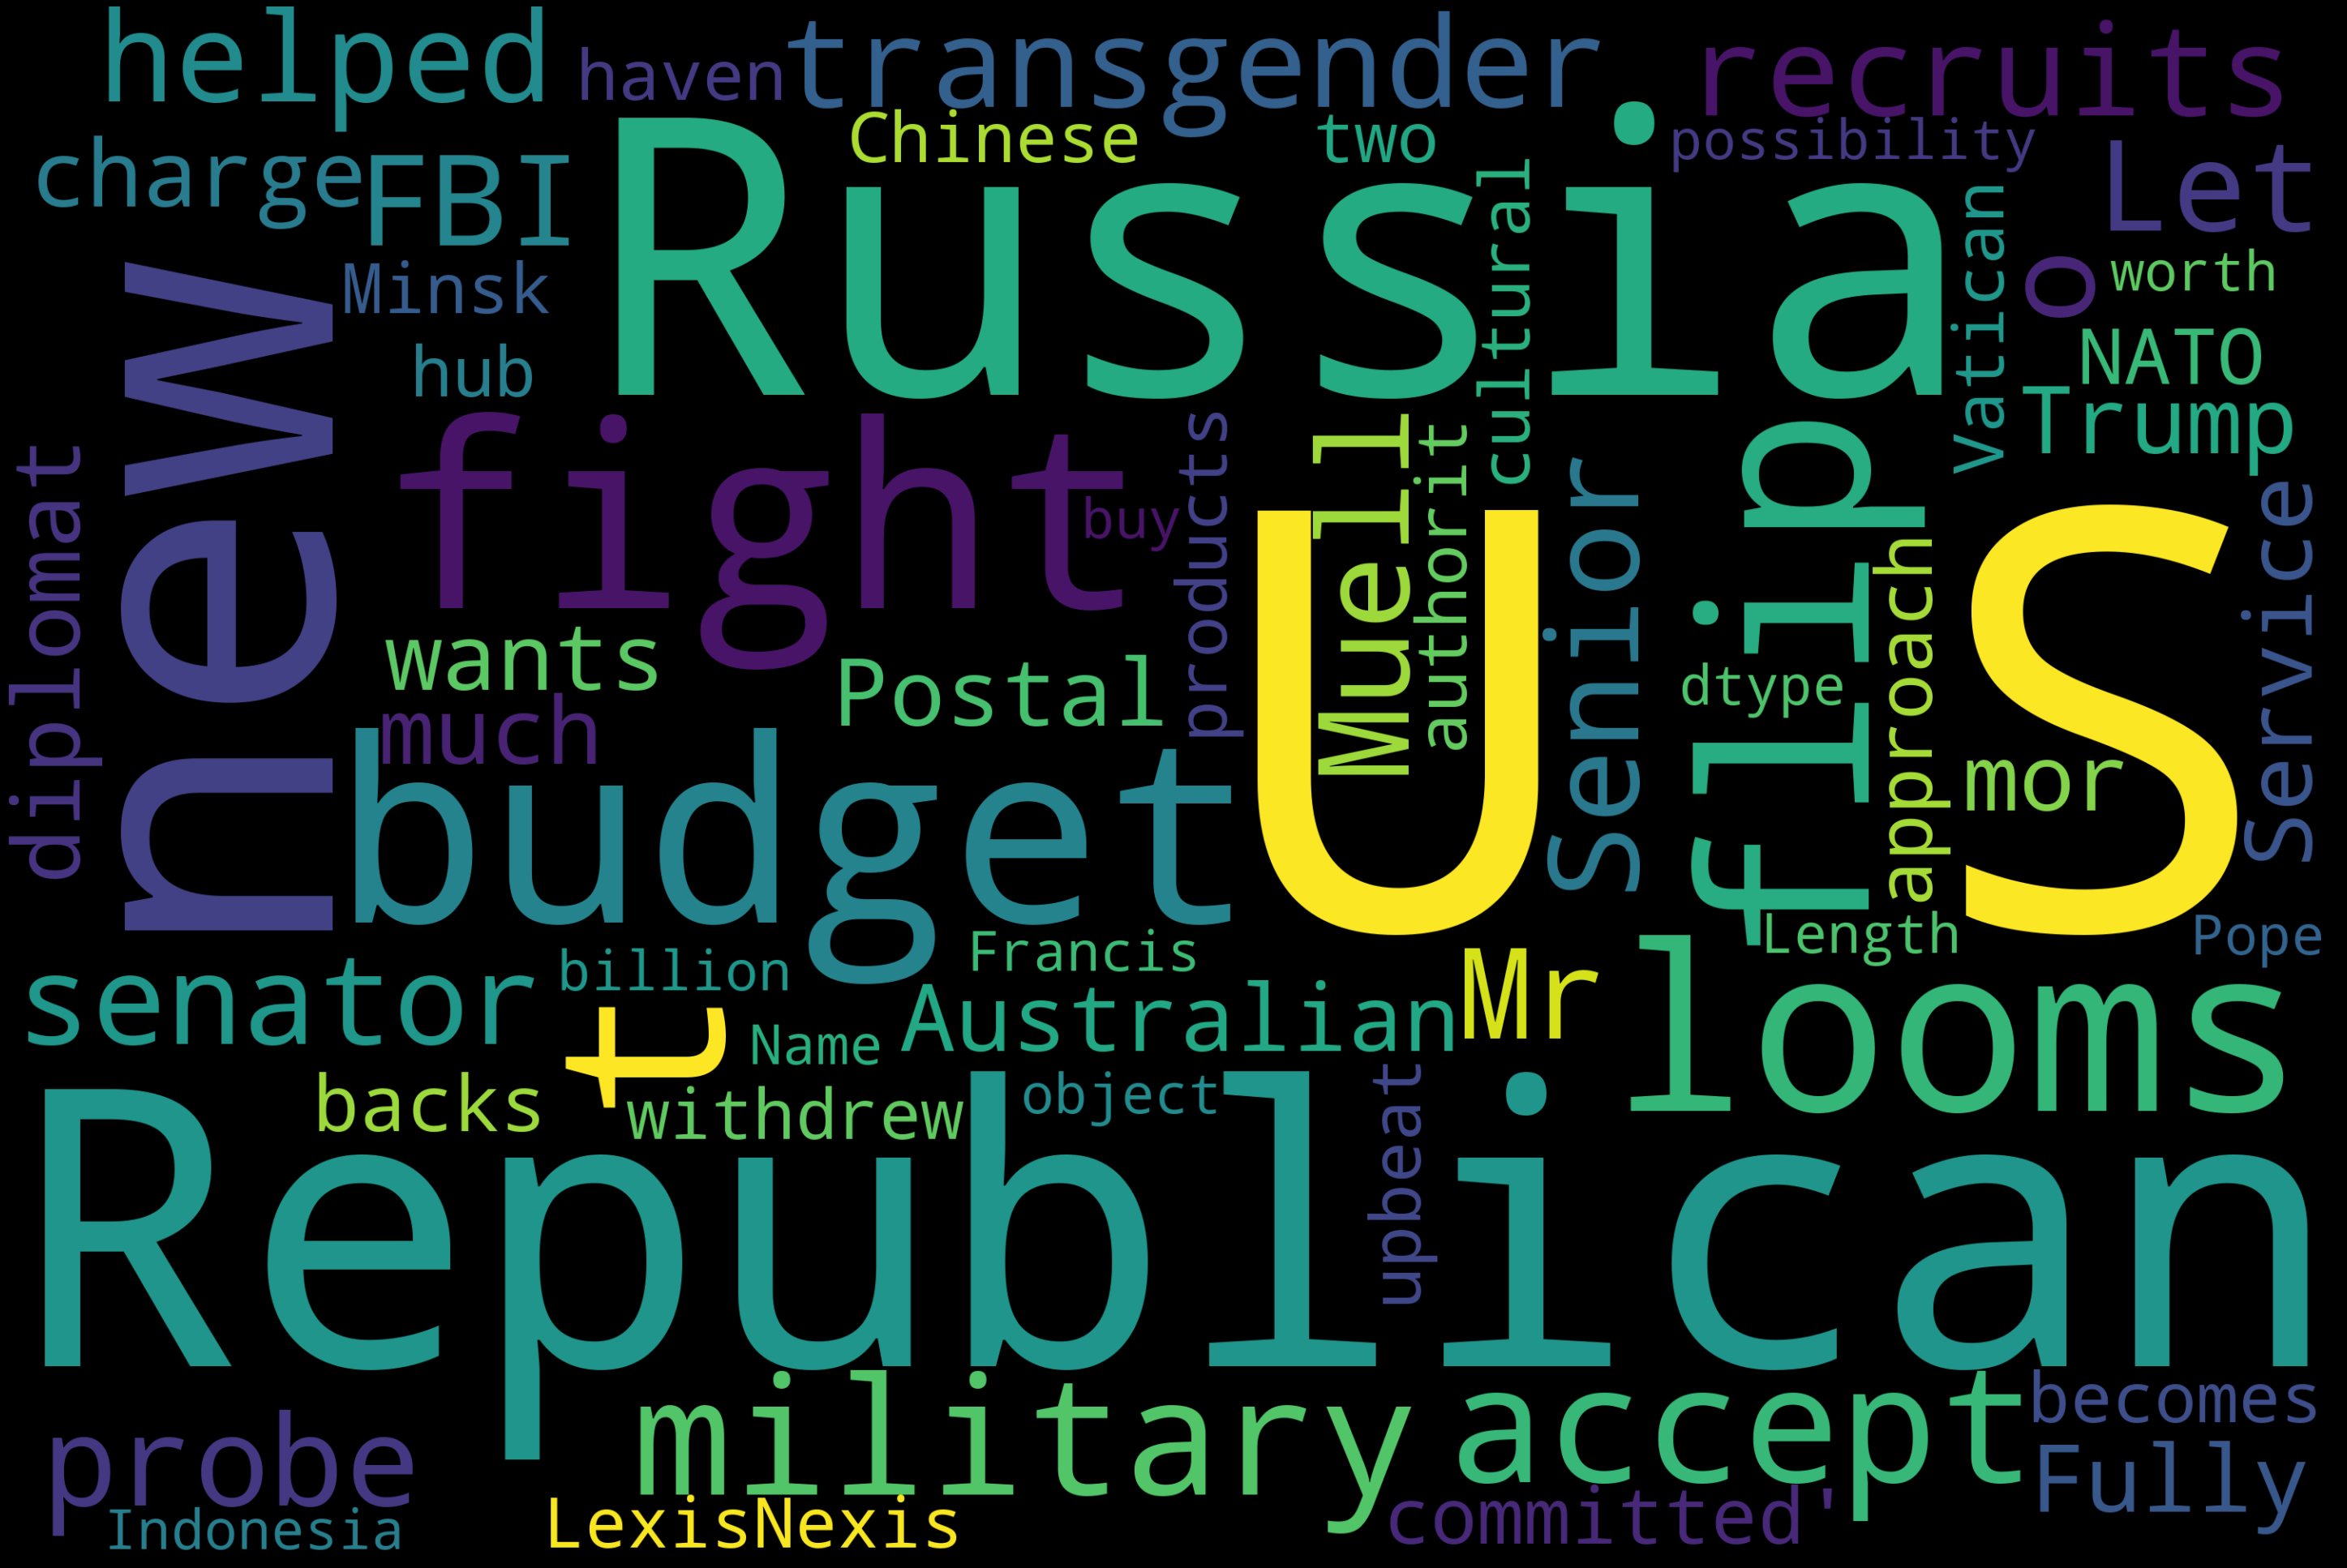

In [21]:
text = true_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis just called donald trump christma...


In [23]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stopwords]
    news = ' '.join(news)
    corpus.append(news)   



In [24]:
#This is how a line looks like now, as computer cannot understand words and their sentiment 
#we need to convert these words into 1's and 0's. To encode it we use TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44888, 5000)

In [25]:
#Getting the target variable
y=clean_news['output']

In [26]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23471, 1: 21417})


In [27]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9677416006804513
Decision Tree Test Accuracy: 0.9366192622171289
KNN Test Accuracy: 0.6079375351671684
Naive Bayes Test Accuracy: 0.9414095616577501


In [30]:
#From the results, we can see logistic regression outdone the rest of the algorithms followed by Naive Bayes and Decision Tree.That's great. 
#So let's go with logistic regression with hyperparameter tuning.
#param_grid = {'C': np.logspace(-4, 4, 50), 'penalty':['l1', 'l2']}
#clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
#best_model = clf.fit(X_train,y_train)
#print(best_model.best_estimator_)
#print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

In [31]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


Confusion matrix, without normalization


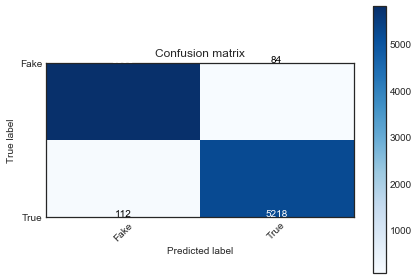

In [32]:
#Confusion Matrix
#Let's look at the true positive and true negative classified by the model
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])

In [33]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5892
           1       0.98      0.98      0.98      5330

    accuracy                           0.98     11222
   macro avg       0.98      0.98      0.98     11222
weighted avg       0.98      0.98      0.98     11222



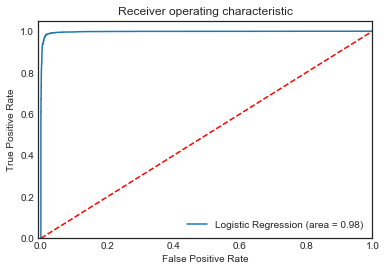

In [34]:
#ROC-AUC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#We should consider the AUC score here which is 98%. Very well. All metrics are performing good. 
#The more far left the curve is better our model We can adjust our threshold based on our ROC curve 
#to get results based on model requirements

In [35]:
#Using Deep Learning and LSTM architecture to detect fake news
train_df, test_df = train_test_split(clean_news, test_size=0.1)
train_X = train_df.iloc[:,2].values
target = train_df.output.values

In [36]:

t = Tokenizer()
t.fit_on_texts(train_X)
vocab_size = len(t.word_index) + 1
vocab_size

233095

In [38]:
train_X

array(['jindal louisiana reels corporate tax giveawaysreuters near end eight years louisiana governor bobby jindal taxslashing conservative presidential hopeful acknowledged state’s business tax breaks gone far “the truth system corporate welfare” jindal said april speech legislators comment resonates now state faces worst budget crisis three decades largely soaring cost subsidies well personal income tax cuts championed jindal business tax subsidies peaked state exempted percent corporate income taxes billion exceeded percent since according louisiana department revenue graphic showing corporate tax exemptions soared state revenue fell see plummeting oil prices dealt latest blow state revenues deficits projected million fiscal year ending june billion next year “it’s gotten pretty bad pretty rapidly” said state legislature’s chief economist greg albrecht believes louisiana heading recession jindal kept low profile since leaving office january not reached comment january speech highlig

In [39]:
target

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
X_train, X_val, Y_train, Y_val = train_test_split( train_X, target , test_size = 0.1, random_state = 42)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(36359,) (4040,) (36359,) (4040,)


In [41]:
r_len=[]
for text in clean_news['news']:
    word = text_to_word_sequence(text)
    l=len(word)
    r_len.append(l)
    
MAX_REVIEW_LEN=np.max(r_len)
MAX_REVIEW_LEN

5016

In [42]:
max_features = 20000
max_words = 5016
batch_size = 128
epochs = 6
num_classes=1

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

X_train = pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)
X_test = tokenizer.texts_to_sequences(test_df['news'])
X_test = pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_val.shape,X_test.shape)

(36359, 5016) (4040, 5016) (4489, 5016)


In [43]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features,embed_dim):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return embedding_matrix

EMBEDDING_FILE = 'D:\\bits\\sem4\\project_dataset\\glove.6B.50d.txt'
embed_dim = 50 #word vector dim
embedding_matrix = get_embed_mat(EMBEDDING_FILE,max_features,embed_dim)
print(embedding_matrix.shape)

Found 400000 word vectors.
(20000, 50)


In [44]:
embedding_matrix[1]

array([-0.15233999,  0.98084998,  1.00650001,  0.97812003,  0.66280001,
        0.11185   ,  0.65486002, -0.47587001,  0.14584   ,  0.088221  ,
       -0.013397  , -0.028024  , -0.67574   , -0.041599  ,  0.16137999,
       -0.040447  , -0.47119999,  0.013284  , -0.63138002,  0.22265001,
       -0.051539  ,  0.033878  , -0.21629   ,  0.036112  , -0.070557  ,
       -1.22909999, -0.17636999, -0.093006  , -0.07129   ,  0.4066    ,
        2.53730011,  0.05641   , -0.17576   ,  0.85382003,  0.070196  ,
       -0.84828001,  0.14811   , -1.10109997, -0.074584  , -0.76635998,
        0.36425   , -0.057073  ,  0.31338   , -0.67127001, -0.12431   ,
        0.46572   ,  0.30576   ,  0.037843  ,  0.71744001,  0.32435   ])

In [65]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
#model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],weights=[embedding_matrix],trainable=True))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

'''
lstm_bidirectional_model = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)
'''

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5016, 50)          1000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 5016, 50)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,060,501
Trainable params: 1,060,501
Non-trainable params: 0
_________________________________________________________________
None


"\nmodel = Sequential()\nmodel.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],weights=[embedding_matrix],trainable=True))\nmodel.add(SpatialDropout1D(0.25))\nmodel.add(Bidirectional(LSTM(128,return_sequences=True)))\nmodel.add(Bidirectional(LSTM(64,return_sequences=False)))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes, activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.summary()\n"

In [ ]:
lstm_bidirectional_model = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/6
 66/285 [=====>........................] - ETA: 7:38:16 - loss: 0.5087 - accuracy: 0.7368

In [52]:
# create the embedding layer
embedding_layer = Embedding(max_features, 50, weights=[embedding_matrix], input_length=max_words, trainable=False)
# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5016, 50)          1000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5012, 128)         32128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2506, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320768)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 320769    
Total params: 1,352,897
Trainable params: 352,897
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [54]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
lstm_model = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)
#lstm_model = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/6
285/285 [==============================] - 540s 2s/step - loss: 1.3124 - accuracy: 0.8048 - val_loss: 0.1153 - val_accuracy: 0.9634
Epoch 2/6
285/285 [==============================] - 517s 2s/step - loss: 0.1002 - accuracy: 0.9660 - val_loss: 0.0775 - val_accuracy: 0.9777
Epoch 3/6
285/285 [==============================] - 512s 2s/step - loss: 0.0559 - accuracy: 0.9835 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 4/6
285/285 [==============================] - 538s 2s/step - loss: 0.0363 - accuracy: 0.9892 - val_loss: 0.0547 - val_accuracy: 0.9856
Epoch 5/6
285/285 [==============================] - 565s 2s/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0526 - val_accuracy: 0.9854
Epoch 6/6
285/285 [==============================] - 555s 2s/step - loss: 0.0163 - accuracy: 0.9964 - val_loss: 0.0543 - val_accuracy: 0.9869


In [63]:
import pickle
lstm_model_file = 'lstm_model.pkl'
pickle.dump(lstm_model, open(lstm_model_file, 'wb'))

TypeError: can't pickle weakref objects

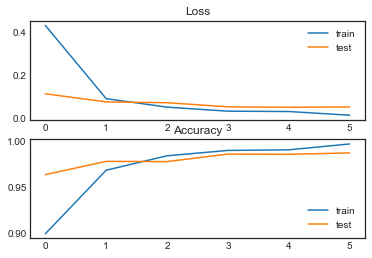

In [55]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(lstm_model.history['loss'], label='train')
plt.plot(lstm_model.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(lstm_model.history['accuracy'], label='train')
plt.plot(lstm_model.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [65]:
import pickle
lstm_model_file = 'lstm_model11.pkl'
pickle.dump(model, open(lstm_model_file, 'wb'))

TypeError: can't pickle weakref objects

In [60]:
import joblib

In [ ]:
'''
Conclusion
We have done a mainstream work on processing the data and building the model. 
We could have indulged in changing the ngrams while vectorizing the text data . 
We took 2 words and vectorized it. 
You can check Shreta's work on the same dataset where she got better results by considering both 1 and 2 word 
and also way better results with the help of LSTM and Bi-LSTM network.Let's discuss on the general insights from the dataset.

Most of the fake news are surrounded among Election news and about Trump. 
Considering the US elections 2020. There are chances to spread fake news and application of these technology will 
be heavily required.
Fake news are currently rooted during this pandemic situation to play politics and to scare people and force 
them to buy goods
Most of the news are from Reuters. We don't know whether this news media is politically influenced. 
So we should always consider the source of news to find if the news is fake or true.

'''